ABALONE DATASET

This dataset was obtained from UCI Machine Learning Repository. A full description of this dataset can be obtained from the website. The objective of this dataset is to predict the age of abalone based on the given eight attributes-sex, length, diameter, height, whole weight, shucked weight, viscera weight, and shell weight. The age is determined by the number of rings. Getting this dataset is expensive since cutting each abalone to measure the ring is an exhaustive and expensive approach. The machine learning process aims to overcome this difficulty by predicting the age of abalone from the aforementioned eight attributes.

The process will mostly involve regression methods. However, classification methods are not rule out as well. This whole document will demonstrate the application of several thorough ML processes, including training and testing, cross-validation, and model evaluation.

This project does not serve to complement or compete the existing research on this dataset. Rather, it is a demonstration of my personal skills and aptitude on using Scikit-Learn, Pandas, Numpy, and Matplotlib.

In [1]:
# getting started with the model 
# importing required libraries/packages 

import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pandas as pd 
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import cross_val_score
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Importing and Reading the Dataset
import os
os.chdir(r'C:\Users\Lalitha\Desktop\Data Science\Machine learning\notebooks\data')
os.getcwd()
data=pd.read_csv('abalone.csv')
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [3]:
#check the missing values
data.isna().sum()

Sex                           2
Length                        2
Diameter                      2
Height                        2
Whole weight                  2
Shucked weight                2
Viscera weightShell weight    2
Shell weight                  2
Rings                         2
dtype: int64

In [4]:
#Fill the missing values with mean
data.fillna(data.mean(),inplace=True)

In [5]:
data.isna().sum()

Sex                           2
Length                        0
Diameter                      0
Height                        0
Whole weight                  0
Shucked weight                0
Viscera weightShell weight    0
Shell weight                  0
Rings                         0
dtype: int64

In [6]:
data.dropna(subset=['Sex'])

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0


In [6]:
#correlation study
data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weightShell weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


In [8]:
# let's explore sex, it is a categorical variable 
data['Sex'].value_counts()

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [9]:
# convert text labels to integer labels
sex_label = LabelEncoder()
data['Sex'] = sex_label.fit_transform(data['Sex'])
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15.0
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7.0
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9.0
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10.0
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7.0


In [10]:
data.dropna()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weightShell weight,Shell weight,Rings
0,2,0.455000,0.365000,0.095000,0.514000,0.224500,0.101000,0.150000,15.000000
1,2,0.350000,0.265000,0.090000,0.225500,0.099500,0.048500,0.070000,7.000000
2,0,0.530000,0.420000,0.135000,0.677000,0.256500,0.141500,0.210000,9.000000
3,2,0.440000,0.365000,0.125000,0.516000,0.215500,0.114000,0.155000,10.000000
4,1,0.330000,0.255000,0.080000,0.205000,0.089500,0.039500,0.055000,7.000000
...,...,...,...,...,...,...,...,...,...
4174,2,0.600000,0.475000,0.205000,1.176000,0.525500,0.287500,0.308000,9.000000
4175,0,0.625000,0.485000,0.150000,1.094500,0.531000,0.261000,0.296000,10.000000
4176,2,0.710000,0.555000,0.195000,1.948500,0.945500,0.376500,0.495000,12.000000
4177,3,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684


In [11]:
data.isna().sum()

Sex                           0
Length                        0
Diameter                      0
Height                        0
Whole weight                  0
Shucked weight                0
Viscera weightShell weight    0
Shell weight                  0
Rings                         0
dtype: int64

In [13]:
# Attribute and target split
X = data.drop(['Sex'], axis=1)
y = data[['Sex']]
print(X.head())
print(y.head())

   Length  Diameter  Height  Whole weight  Shucked weight  \
0   0.455     0.365   0.095        0.5140          0.2245   
1   0.350     0.265   0.090        0.2255          0.0995   
2   0.530     0.420   0.135        0.6770          0.2565   
3   0.440     0.365   0.125        0.5160          0.2155   
4   0.330     0.255   0.080        0.2050          0.0895   

   Viscera weightShell weight  Shell weight  Rings  
0                      0.1010         0.150   15.0  
1                      0.0485         0.070    7.0  
2                      0.1415         0.210    9.0  
3                      0.1140         0.155   10.0  
4                      0.0395         0.055    7.0  
   Sex
0    2
1    2
2    0
3    2
4    1


In [14]:

from sklearn import linear_model

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   random_state=25)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_scaled = scaler.transform(X)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

[[12.87702288 12.64802421  6.31573322  0.86103151 -7.32424554  6.35151044
   0.          0.84876228]
 [10.91730206  4.18724429 -1.2661579  -9.01901028  2.02170133 -8.96978386
   0.63806247 -0.54752807]
 [-0.61352326  0.35819707  0.7840796   0.70768407  4.48686866  0.59290637
  -2.84090689  0.        ]
 [ 0.          0.          0.          0.          0.          0.
   0.         -0.67619194]]
[-15.95193271   2.76879451  -4.38008188  -9.4098277 ]


Text(0, 0.5, 'Predicted')

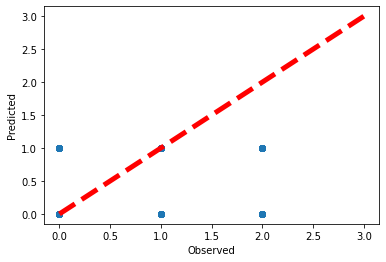

In [15]:
clf = linear_model.SGDClassifier(loss='hinge', penalty='elasticnet')
clf.fit(X_train, y_train)
print(clf.coef_)
print(clf.intercept_)
y_predict = clf.predict(X_test)

fig, ax = plt.subplots()
ax.scatter(y_test, y_predict)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=5)
ax.set_xlabel('Observed')
ax.set_ylabel('Predicted')

In [16]:
#import the knn model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [17]:
#see the cross_validated score for cv=3
from sklearn.model_selection import cross_val_score
cross_val_score(knn,X,y,cv=3).mean()

0.527877482651352

In [ ]:
#KNN showing 52.78% is the resemblance of points in the training set.

In [18]:
#for no.of neighbors from 1 - 10, graph the k-fold scores
scores = []
for i in range(1,11,1):
    knn = KNeighborsClassifier(n_neighbors=i, weights='uniform')
    scores.append(cross_val_score(knn,X,y,cv=3).mean())

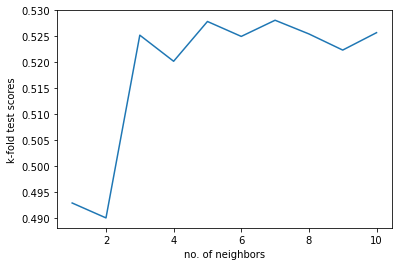

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(1,11,1),scores)
plt.xlabel('no. of neighbors')
plt.ylabel('k-fold test scores')
plt.show()


5-NN is the best model

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='ovr')

In [21]:
#split to train and test for cross-validation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [22]:
#Do k-fold cross validation using Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

cross_val_score(LogisticRegression(),X_scaled,y,cv=4).mean()

0.5558749931254469

In [23]:
#scale the features using training set
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = pd.DataFrame(sc.fit_transform(X_train),columns=X.columns)
X_test_scaled = pd.DataFrame(sc.transform(X_test),columns=X.columns)

In [24]:
#import the model
from sklearn.linear_model import LogisticRegression
#We use saga solver for large dataset 
#and class_weight to deal with the imbalance
model = LogisticRegression(max_iter=500,tol=0.001,solver='saga', 
                           class_weight={False:1, True:9})

In [25]:
#Training the model 
model.fit(X_train_scaled,y_train)

LogisticRegression(class_weight={False: 1, True: 9}, max_iter=500,
                   solver='saga', tol=0.001)

In [26]:
#Validating the model

model.score(X_test_scaled,y_test)

0.45454545454545453

In [27]:
from sklearn.metrics import confusion_matrix, classification_report

In [28]:
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test,y_pred))
confusion_matrix(y_test,y_pred)

              precision    recall  f1-score   support

           0       0.55      0.21      0.30       390
           1       0.45      0.97      0.61       434
           2       0.42      0.17      0.24       430

    accuracy                           0.45      1254
   macro avg       0.47      0.45      0.38      1254
weighted avg       0.47      0.45      0.39      1254



array([[ 80, 222,  88],
       [  6, 419,   9],
       [ 60, 299,  71]], dtype=int64)

In [1]:
#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
from sklearn.svm import SVC

In [2]:
from sklearn.model_selection import GridSearchCV

In [ ]:
models.append(('SVM', SVC()))

In [ ]:
model.best_params_

In [ ]:
model.best_score_

In [ ]:
svm =model.best_estimator_

In [ ]:
svm.fit(X_train,y_train)

In [31]:
#including other params like max_depth, we will apply gridsearch to fine the best settings for the RandomForest
params = {
            'n_estimators': [80,90,100],
            'max_depth': [12,14,16]
        }
model = GridSearchCV(RandomForestClassifier(random_state=0), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [12, 14, 16],
                         'n_estimators': [80, 90, 100]})

In [32]:
model.best_params_

{'max_depth': 16, 'n_estimators': 100}

In [33]:
model.best_score_

0.5496519184586335

In [34]:
best_model = model.best_estimator_

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=0)

In [36]:
best_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=16, random_state=0)

In [37]:
y_pred = best_model.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.42      0.38      0.40       324
           1       0.71      0.74      0.73       368
           2       0.45      0.48      0.46       353

    accuracy                           0.54      1045
   macro avg       0.53      0.53      0.53      1045
weighted avg       0.53      0.54      0.54      1045



In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt


In [41]:
#Graph k-fold score vs no. of estimators in Random Forest
scores = []
for i in range(10,101,10):
    scores.append(cross_val_score(RandomForestClassifier(n_estimators=i,random_state=0),
                                  X,y,cv=4).mean())

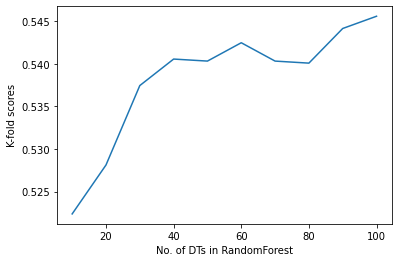

In [42]:
plt.plot(range(10,101,10),scores)
plt.xlabel('No. of DTs in RandomForest')
plt.ylabel('K-fold scores')
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier
#including other params like max_depth, we will apply gridsearch to fine the best settings 
params = {
            'n_estimators': [70,80,90,100],
            'base_estimator': [DecisionTreeClassifier(max_depth=9,random_state=0),
                               DecisionTreeClassifier(max_depth=10,random_state=0),
                               DecisionTreeClassifier(max_depth=11,random_state=0)]
        }
model = GridSearchCV(AdaBoostClassifier(random_state=0), params,cv=4)
model.fit(X,y)

GridSearchCV(cv=4, estimator=AdaBoostClassifier(random_state=0),
             param_grid={'base_estimator': [DecisionTreeClassifier(max_depth=9,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=10,
                                                                   random_state=0),
                                            DecisionTreeClassifier(max_depth=11,
                                                                   random_state=0)],
                         'n_estimators': [70, 80, 90, 100]})

In [43]:
model.best_params_

{'base_estimator': DecisionTreeClassifier(max_depth=9, random_state=0),
 'n_estimators': 70}

In [44]:
model.best_score_

0.550131533117014

From the above experiments, Adaboost is slightly better for the current dataset with 4-fold score of 55.03% accuracy than RandomForest which has 54.96% 4-fold accuracy. The hyper-parameter tuning using Gridsearch shows that both RandomForest and Adaboost using Decision needs similar number of DTs in their ensemble to give the best score. 

#PYSPARK

In [1]:
#set environment
import os
import sys
 
os.environ["SPARK_HOME"] = "/usr/hdp/current/spark2-client"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
# In below two lines, use /usr/bin/python2.7 if you want to use Python 2
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.4-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")

In [2]:
#import Sparksession driver
from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("Abalone classification Arun kumar") \
    .getOrCreate()

In [3]:
data = spark.read.csv('abalone.csv',header = True,inferSchema=True) 

In [4]:
#Check for missing values
for col in data.columns:
    print("no. of cells in column", col, "with null values:", data.filter(data[col].isNull()).count())

no. of cells in column Sex with null values: 2
no. of cells in column Length with null values: 2
no. of cells in column Diameter with null values: 2
no. of cells in column Height with null values: 2
no. of cells in column Whole weight with null values: 2
no. of cells in column Shucked weight with null values: 2
no. of cells in column Viscera weightShell weight with null values: 2
no. of cells in column Shell weight with null values: 2
no. of cells in column Rings with null values: 2


In [5]:
from pyspark.sql.functions import avg
def mean_of_pyspark_columns(data, numeric_cols, verbose=False):
    col_with_mean={}
    for col in numeric_cols:
        mean_value = data.select(avg(data[col]))
        avg_col = mean_value.columns[0]
        res = mean_value.rdd.map(lambda row : row[avg_col]).collect()
        
        if (verbose==True): print(mean_value.columns[0], "\t", res[0])
        col_with_mean[col]=res[0]    
    return col_with_mean

In [41]:
mean_of_pyspark_columns(data,['Viscera weightShell weight','Length','Diameter','Height','Whole weight','Shucked weight','Shell weight','Rings'])

{'Viscera weightShell weight': 0.18059360785252604,
 'Length': 0.5239920995930099,
 'Diameter': 0.407881254488869,
 'Height': 0.1395163993296614,
 'Whole weight': 0.82874215944458,
 'Shucked weight': 0.35936748862820106,
 'Shell weight': 0.23883085946851795,
 'Rings': 9.933684462532918}

In [6]:
data = data.fillna(mean_of_pyspark_columns(data,['Viscera weightShell weight','Length','Diameter','Height','Whole weight','Shucked weight','Shell weight','Rings']))

In [7]:
#Check for missing values
for col in data.columns:
    print("no. of cells in column", col, "with null values:", data.filter(data[col].isNull()).count())

no. of cells in column Sex with null values: 2
no. of cells in column Length with null values: 0
no. of cells in column Diameter with null values: 0
no. of cells in column Height with null values: 0
no. of cells in column Whole weight with null values: 0
no. of cells in column Shucked weight with null values: 0
no. of cells in column Viscera weightShell weight with null values: 0
no. of cells in column Shell weight with null values: 0
no. of cells in column Rings with null values: 0


In [8]:
data.show()

+---+------+--------+------+------------+--------------+--------------------------+------------+-----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weightShell weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------------------+------------+-----+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|                     0.101|        0.15|   15|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|                    0.0485|        0.07|    7|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|                    0.1415|        0.21|    9|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|                     0.114|       0.155|   10|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|                    0.0395|       0.055|    7|
|  I| 0.425|     0.3| 0.095|      0.3515|         0.141|                    0.0775|        0.12|    8|
|  F|  0.53|   0.415|  0.15|      0.7775|         0.237|                 

In [9]:
def mode_of_pyspark_columns(data, cat_col_list, verbose=False):
    col_with_mode={}
    for col in cat_col_list:
        #Filter null
        data = data.filter(data[col].isNull()==False)
        #Find unique_values_with_count
        unique_classes = data.select(col).distinct().rdd.map(lambda x: x[0]).collect()
        unique_values_with_count=[]
        for uc in unique_classes:
             unique_values_with_count.append([uc, data.filter(data[col]==uc).count()])
        #sort unique values w.r.t their count values
        sorted_unique_values_with_count= sorted(unique_values_with_count, key = lambda x: x[1], reverse =True)
        
        if (verbose==True): print(col, sorted_unique_values_with_count, " and mode is ", sorted_unique_values_with_count[0][0])
        col_with_mode[col] = sorted_unique_values_with_count[0][0]
    return col_with_mode

In [10]:
mode_of_pyspark_columns(data,["Sex"],True)

Sex [['M', 1528], ['I', 1342], ['F', 1307]]  and mode is  M


{'Sex': 'M'}

In [11]:
data.fillna(mode_of_pyspark_columns(data,["Sex"])).show()

+---+------+--------+------+------------+--------------+--------------------------+------------+-----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weightShell weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------------------+------------+-----+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|                     0.101|        0.15|   15|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|                    0.0485|        0.07|    7|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|                    0.1415|        0.21|    9|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|                     0.114|       0.155|   10|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|                    0.0395|       0.055|    7|
|  I| 0.425|     0.3| 0.095|      0.3515|         0.141|                    0.0775|        0.12|    8|
|  F|  0.53|   0.415|  0.15|      0.7775|         0.237|                 

In [12]:
#Check for missing values
for col in data.columns:
    print("no. of cells in column", col, "with null values:", data.filter(data[col].isNull()).count())

no. of cells in column Sex with null values: 2
no. of cells in column Length with null values: 0
no. of cells in column Diameter with null values: 0
no. of cells in column Height with null values: 0
no. of cells in column Whole weight with null values: 0
no. of cells in column Shucked weight with null values: 0
no. of cells in column Viscera weightShell weight with null values: 0
no. of cells in column Shell weight with null values: 0
no. of cells in column Rings with null values: 0


In [13]:
data = data.dropna(subset=("Sex"))

In [14]:
#Check for missing values
for col in data.columns:
    print("no. of cells in column", col, "with null values:", data.filter(data[col].isNull()).count())

no. of cells in column Sex with null values: 0
no. of cells in column Length with null values: 0
no. of cells in column Diameter with null values: 0
no. of cells in column Height with null values: 0
no. of cells in column Whole weight with null values: 0
no. of cells in column Shucked weight with null values: 0
no. of cells in column Viscera weightShell weight with null values: 0
no. of cells in column Shell weight with null values: 0
no. of cells in column Rings with null values: 0


In [25]:
#Label encoder
from pyspark.ml.feature import StringIndexer
indexed = data
for col in data.columns:
    stringIndexer = StringIndexer(inputCol=col, outputCol=col+"_encoded")
    indexed = stringIndexer.fit(indexed).transform(indexed)
indexed.show()

+---+------+--------+------+------------+--------------+--------------------------+------------+-----+-----------+--------------+----------------+--------------+--------------------+----------------------+----------------------------------+--------------------+-------------+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weightShell weight|Shell weight|Rings|Sex_encoded|Length_encoded|Diameter_encoded|Height_encoded|Whole weight_encoded|Shucked weight_encoded|Viscera weightShell weight_encoded|Shell weight_encoded|Rings_encoded|
+---+------+--------+------+------------+--------------+--------------------------+------------+-----+-----------+--------------+----------------+--------------+--------------------+----------------------+----------------------------------+--------------------+-------------+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|                     0.101|        0.15|   15|        0.0|          42.0|            33.0|          20.0|           

In [15]:
#Label encoder
from pyspark.ml.feature import StringIndexer
indexed = data
for col in data.columns:
    stringIndexer = StringIndexer(inputCol=col, outputCol=col+"_encoded")
    indexed = stringIndexer.fit(indexed).transform(indexed)
indexed.show()

+---+------+--------+------+------------+--------------+--------------------------+------------+-----+-----------+--------------+----------------+--------------+--------------------+----------------------+----------------------------------+--------------------+-------------+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weightShell weight|Shell weight|Rings|Sex_encoded|Length_encoded|Diameter_encoded|Height_encoded|Whole weight_encoded|Shucked weight_encoded|Viscera weightShell weight_encoded|Shell weight_encoded|Rings_encoded|
+---+------+--------+------+------------+--------------+--------------------------+------------+-----+-----------+--------------+----------------+--------------+--------------------+----------------------+----------------------------------+--------------------+-------------+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|                     0.101|        0.15|   15|        0.0|          42.0|            33.0|          20.0|           

In [26]:
#all the independent variables need to be packed into one column of vector type
from pyspark.ml.feature import VectorAssembler
assembler = VectorAssembler(inputCols=['Viscera weightShell weight','Length','Diameter','Height','Whole weight','Shucked weight','Shell weight','Rings'], 
                            outputCol="features")
feature_vec=assembler.transform(indexed)
feature_vec.select("features").show(5)

+--------------------+
|            features|
+--------------------+
|[0.101,0.455,0.36...|
|[0.0485,0.35,0.26...|
|[0.1415,0.53,0.42...|
|[0.114,0.44,0.365...|
|[0.0395,0.33,0.25...|
+--------------------+
only showing top 5 rows



In [27]:
#Count of target classes
feature_vec.groupBy('Sex_encoded').count().show()
#there is data imbalance

+-----------+-----+
|Sex_encoded|count|
+-----------+-----+
|        0.0| 1528|
|        1.0| 1342|
|        2.0| 1307|
+-----------+-----+



In [28]:
# Split the data into train and test sets
train_data, test_data = feature_vec.randomSplit([.75,.25],seed=0)

In [29]:
train_data.show(5)

+---+------+--------+------+------------+--------------+--------------------------+------------+-----+-----------+--------------+----------------+--------------+--------------------+----------------------+----------------------------------+--------------------+-------------+--------------------+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weightShell weight|Shell weight|Rings|Sex_encoded|Length_encoded|Diameter_encoded|Height_encoded|Whole weight_encoded|Shucked weight_encoded|Viscera weightShell weight_encoded|Shell weight_encoded|Rings_encoded|            features|
+---+------+--------+------+------------+--------------+--------------------------+------------+-----+-----------+--------------+----------------+--------------+--------------------+----------------------+----------------------------------+--------------------+-------------+--------------------+
|  F|  0.29|    0.21| 0.075|       0.275|         0.113|                    0.0675|       0.035|    6|       

In [20]:
train_data.show(1)

+---+------+--------+------+------------+--------------+--------------------------+------------+-----+-----------+--------------+----------------+--------------+--------------------+----------------------+----------------------------------+--------------------+-------------+--------------------+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weightShell weight|Shell weight|Rings|Sex_encoded|Length_encoded|Diameter_encoded|Height_encoded|Whole weight_encoded|Shucked weight_encoded|Viscera weightShell weight_encoded|Shell weight_encoded|Rings_encoded|            features|
+---+------+--------+------+------------+--------------+--------------------------+------------+-----+-----------+--------------+----------------+--------------+--------------------+----------------------+----------------------------------+--------------------+-------------+--------------------+
|  F|  0.29|    0.21| 0.075|       0.275|         0.113|                    0.0675|       0.035|    6|       

In [30]:
from pyspark.ml.classification import LogisticRegression

# Create initial LogisticRegression model
lr = LogisticRegression(labelCol="Sex_encoded", featuresCol="features",  
                        maxIter=100, regParam=0.0001, family="multinomial",  
                        elasticNetParam=0.0)

# Train model with Training Data
lrModel = lr.fit(train_data)
predictions = lrModel.transform(test_data)
predictions.printSchema()

root
 |-- Sex: string (nullable = true)
 |-- Length: double (nullable = false)
 |-- Diameter: double (nullable = false)
 |-- Height: double (nullable = false)
 |-- Whole weight: double (nullable = false)
 |-- Shucked weight: double (nullable = false)
 |-- Viscera weightShell weight: double (nullable = false)
 |-- Shell weight: double (nullable = false)
 |-- Rings: integer (nullable = true)
 |-- Sex_encoded: double (nullable = true)
 |-- Length_encoded: double (nullable = true)
 |-- Diameter_encoded: double (nullable = true)
 |-- Height_encoded: double (nullable = true)
 |-- Whole weight_encoded: double (nullable = true)
 |-- Shucked weight_encoded: double (nullable = true)
 |-- Viscera weightShell weight_encoded: double (nullable = true)
 |-- Shell weight_encoded: double (nullable = true)
 |-- Rings_encoded: double (nullable = true)
 |-- features: vector (nullable = true)
 |-- rawPrediction: vector (nullable = true)
 |-- probability: vector (nullable = true)
 |-- prediction: double (nu

In [31]:
predictions.select('Sex_encoded','prediction').show()

+-----------+----------+
|Sex_encoded|prediction|
+-----------+----------+
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       1.0|
|        2.0|       0.0|
|        2.0|       1.0|
+-----------+----------+
only showing top 20 rows



In [32]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Sex_encoded', metricName='accuracy')
evaluator.evaluate(predictions)

0.5663716814159292

In [33]:
evaluator = MulticlassClassificationEvaluator(predictionCol='prediction', labelCol='Sex_encoded', metricName='f1')
evaluator.evaluate(predictions)

0.5537879681042486

In [34]:
predictions.groupBy('Sex_encoded').count().show()

+-----------+-----+
|Sex_encoded|count|
+-----------+-----+
|        0.0|  386|
|        1.0|  323|
|        2.0|  308|
+-----------+-----+



In [35]:
#Grid Search
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator

paramGrid = (ParamGridBuilder()\
             .addGrid(lr.regParam,[0.001,0.01,0.1,1])\
             .addGrid(lr.elasticNetParam,[0.0,0.5,1.0])\
             .build())

# Create 4-fold CrossValidator
cv = CrossValidator(estimator=lr, estimatorParamMaps=paramGrid, evaluator=evaluator, numFolds=4)

cvModel = cv.fit(train_data)

In [36]:
list(zip(cvModel.avgMetrics, cvModel.getEstimatorParamMaps()))

[(0.5394926364202273,
  {Param(parent='LogisticRegression_4b9e8cdff58bc562d4af', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LogisticRegression_4b9e8cdff58bc562d4af', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0}),
 (0.5315962351914789,
  {Param(parent='LogisticRegression_4b9e8cdff58bc562d4af', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LogisticRegression_4b9e8cdff58bc562d4af', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.5}),
 (0.5341187842189148,
  {Param(parent='LogisticRegression_4b9e8cdff58bc562d4af', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
   Param(parent='LogisticRegression_4b9e8cdff58bc562d4af', name='elasticNetParam', doc='the ElasticNet m

In [37]:
#Best Model Params
score_params_list = list(zip(cvModel.avgMetrics, cvModel.getEstimatorParamMaps()))
max(score_params_list,key=lambda item:item[0])

(0.5394926364202273,
 {Param(parent='LogisticRegression_4b9e8cdff58bc562d4af', name='regParam', doc='regularization parameter (>= 0).'): 0.001,
  Param(parent='LogisticRegression_4b9e8cdff58bc562d4af', name='elasticNetParam', doc='the ElasticNet mixing parameter, in range [0, 1]. For alpha = 0, the penalty is an L2 penalty. For alpha = 1, it is an L1 penalty.'): 0.0})

In [38]:
predictions = cvModel.bestModel.transform(test_data)

In [39]:
evaluator.evaluate(predictions)

0.5596576259026393

In [40]:
data.show()

+---+------+--------+------+------------+--------------+--------------------------+------------+-----+
|Sex|Length|Diameter|Height|Whole weight|Shucked weight|Viscera weightShell weight|Shell weight|Rings|
+---+------+--------+------+------------+--------------+--------------------------+------------+-----+
|  M| 0.455|   0.365| 0.095|       0.514|        0.2245|                     0.101|        0.15|   15|
|  M|  0.35|   0.265|  0.09|      0.2255|        0.0995|                    0.0485|        0.07|    7|
|  F|  0.53|    0.42| 0.135|       0.677|        0.2565|                    0.1415|        0.21|    9|
|  M|  0.44|   0.365| 0.125|       0.516|        0.2155|                     0.114|       0.155|   10|
|  I|  0.33|   0.255|  0.08|       0.205|        0.0895|                    0.0395|       0.055|    7|
|  I| 0.425|     0.3| 0.095|      0.3515|         0.141|                    0.0775|        0.12|    8|
|  F|  0.53|   0.415|  0.15|      0.7775|         0.237|                 

knn model	52.78%
Logistic Regression	55.58%
RandomForest	54.96%
AdaBoost	55.01%
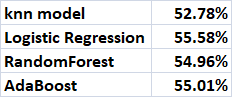

In [ ]:
#All the models,KNN 52.78% Logistic regression 55.58% ADA Boost 55.01 Randam forest 54.96%.The best is LR 55.58% amongst them.
#Even  though we used the best predictive models the data set doesnt give us the best numbers and it is not worth it to 
carry on further analysis with this data set.The best predictor with accuracy 55.96% in Logistic Regression Pyspark is the 
best but the rates are not good enough to select the model.

Thanks & rgds

Arun kumar
